## Questions to answer

basic frequency count to start <br>
who retweeted who <br>
<li></li>
what media organizations does trump tweet about <br>
frequency of topics over time <br>

In [7]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib as mplstyle
import matplotlib.pyplot as plt
import locale
import arrow
from locale import atof
from dateutil import parser
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [8]:
## functions
# regex function
def begRegex(string, sep):
    beginningStr = string.split(sep, 1)[0]
    return beginningStr

def endRegex(string, sep):
    endStr = string.split(sep, 1)[1]
    return endStr

# find RTs
def findStr(text, string):
    if text.find(string) != -1:
        return True
    
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MMM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MMM DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd')

# convert to time
def convertUTCtoTime(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('h:mm A')

# convert to int
def convertToInt(num):
    num = int(math.floor(num))
    return num

In [9]:
# load data
df = pd.read_csv('data/trump-tweets.csv')

In [10]:
# rename and reorder columns
df_expanded = df
df_expanded = df_expanded.rename(columns = {'date':'utc'})
cols = list(df_expanded)
cols = ['utc', 'handle', 'text', 'url', 'exists']
df_expanded = df_expanded[cols]

# convert utc column from obj to datetime
df_expanded['utc'] = pd.to_datetime(df_expanded['utc'])
# df_expanded

In [11]:
# convert utc to more readable format
df_expanded['est'] = df_expanded['utc'].apply(convertUTCtoFull)
df_expanded['month/day'] = df_expanded['utc'].apply(convertUTCtoMonthDay)
df_expanded['month'] = df_expanded['utc'].apply(convertUTCtoMonth)
df_expanded['day'] = df_expanded['utc'].apply(convertUTCtoDay)
df_expanded['day of week'] = df_expanded['utc'].apply(convertUTCtoDayOfWeek)
df_expanded['time'] = df_expanded['utc'].apply(convertUTCtoTime)
# df_expanded

In [18]:
# condense and move date info to new dataframe
df_byTime = df_expanded 
cols = ['utc','day of week','month','day','time','handle','text','exists']
df_byTime = df_byTime[cols]
df_byTime['day'] = df_byTime['day'].astype(str).astype(int)
df_byTime

,utc,day of week,month,day,time,handle,text,exists
0,2017-01-23 11:38:16,Monday,Jan,23,6:38 AM,realDonaldTrump,Busy week planned with a heavy focus on jobs a...,True
1,2017-01-22 14:23:17,Sunday,Jan,22,9:23 AM,realDonaldTrump,Peaceful protests are a hallmark of our democr...,True
2,2017-01-22 12:51:36,Sunday,Jan,22,7:51 AM,realDonaldTrump,"Wow, television ratings just out: 31 million p...",True
3,2017-01-22 12:47:21,Sunday,Jan,22,7:47 AM,realDonaldTrump,Watched protests yesterday but was under the i...,True
4,2017-01-22 12:35:09,Sunday,Jan,22,7:35 AM,realDonaldTrump,Had a great meeting at CIA Headquarters yester...,True
5,2017-01-21 23:54:31,Saturday,Jan,21,6:54 PM,realDonaldTrump,"RT @WhiteHouse: ""Do not allow anyone to tell y...",True
6,2017-01-21 11:53:41,Saturday,Jan,21,6:53 AM,realDonaldTrump,A fantastic day and evening in Washington D.C....,True
7,2017-01-21 04:56:15,Friday,Jan,20,11:56 PM,realDonaldTrump,THANK YOU for another wonderful evening in Was...,True
8,2017-01-20 18:13:48,Friday,Jan,20,1:13 PM,realDonaldTrump,TO ALL AMERICANS🇺🇸\nhttps://t.co/D7Es6ie4fY,True
9,2017-01-20 18:00:43,Friday,Jan,20,1:00 PM,realDonaldTrump,"So to all Americans, in every city near and fa...",True


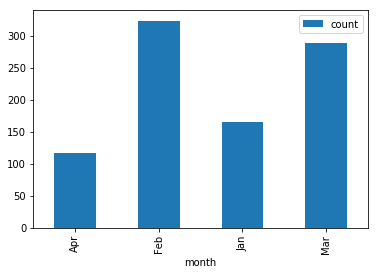

In [33]:
# print('no. of tweets by month')
df_byTime.groupby('month').count().reset_index().drop(['day of week','day','time','handle','text','exists'],axis=1).rename(columns = {'utc':'count'}).plot(kind='bar', x='month')

In [16]:
# print('no. of tweets by day')
# df_byTime.groupby('day').dtypes
# .sum().plot(kind='bar')

In [ ]:
# df_exist = df_expanded[df_expanded['exists'] == False]
# df_exist.sort_values('utc', ascending=False).to_csv('deleted_tweets.csv')

# df_expanded['retweet'] = np.vectorize(findStr)(df_expanded['text'],'RT @')
# df_retweets = df_expanded[df_expanded['retweet'] == True]
# retweetCountByHandle = pd.value_counts(df_retweets['handle'].values, sort=True)
# retweetCountByHandle